# Mapeo del plano $s$ en $z$

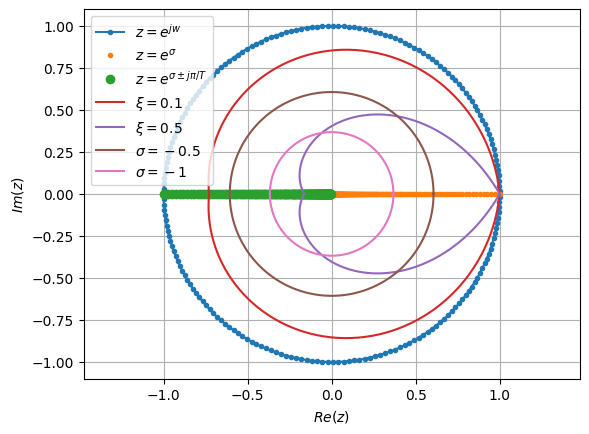

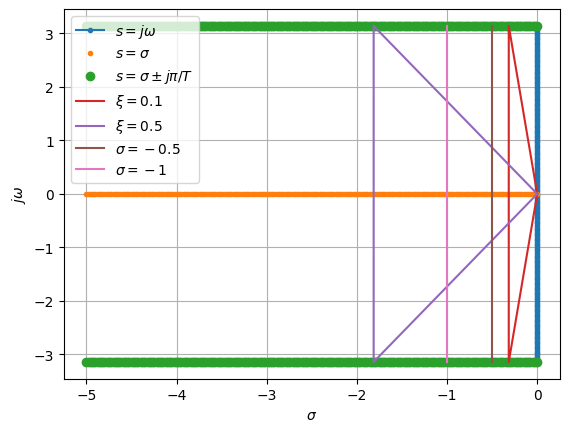

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# eje jw
w = np.linspace(-np.pi, np.pi, 200)
s = 1j * w
z = np.exp(s)
plt.figure(1)
plt.plot(np.real(z), np.imag(z),'.-', label='$z = e^{jw}$')
plt.figure(2)
plt.plot(np.real(s), np.imag(s),'.-', label='$s = j\omega$')

s = np.linspace(0,-5, 200)
z = np.exp(s)
plt.figure(1)
plt.plot(np.real(z), np.imag(z), '.',label='$z = e^{\sigma}$')
plt.figure(2)
plt.plot(np.real(s), np.imag(s), '.', label='$s = \sigma$')

s = np.linspace(0,-5, 200) + 1j * np.pi 
ss = np.hstack((s, np.conj(s[::-1])))
z = np.exp(s)
plt.figure(1)
plt.plot(np.real(z), np.imag(z), 'o', label='$z = e^{\sigma \pm j \pi/T}$')
plt.figure(2)
plt.plot(np.real(ss), np.imag(ss), 'o',label='$s = \sigma \pm j \pi/T$')


# curva de amortiguamiento cte
wd = np.linspace(0, np.pi, 200)
for xi in [0.1, 0.5]:
    wn = np.sqrt(wd**2/(1- xi**2))
    s = -xi * wn + 1j * np.sqrt(wd**2)
    ss = np.hstack((s, np.conj(s[::-1])))
    z = np.exp(s)
    zz = np.hstack((z,np.conj(z[::-1])))
    plt.figure(1)
    plt.plot(np.real(zz), np.imag(zz), label=f'$\\xi={xi}$')
    plt.figure(2)
    plt.plot(np.real(ss), np.imag(ss), label=f'$\\xi={xi}$')

# curva de sigma cte
for sigma in [-0.5, -1]:
    s = sigma + 1j * np.sqrt(wd**2)
    ss = np.hstack((s[::-1], np.conj(s)))
    z = np.exp(s)
    zz = np.hstack((z,np.conj(z[::-1])))
    plt.figure(1)
    plt.plot(np.real(zz), np.imag(zz), label=f'$\sigma={sigma}$')
    plt.figure(2)
    plt.plot(np.real(ss), np.imag(ss), label=f'$\sigma={sigma}$')


plt.figure(1)
plt.xlabel('$Re(z)$')
plt.ylabel('$Im(z)$')
plt.grid()
plt.legend()
plt.axis('equal')

plt.figure(2)
plt.xlabel('$\sigma$')
plt.ylabel('$j\omega$')
plt.grid()
plt.legend()
#plt.axis('equal')
plt.show()

# Evaluación de las distintas aproximaciones del eje $j\omega$

Euler Forward mapea una línea recta que pasa por $z=1$

Euler Backward un círculo de radio $\frac{1}{2}$ centrado en $z=\frac{1}{2}$ 

Tustin un círculo de radio 1 centrado en el origen.

En las tres aproximaciones no se produce un solapamiento del plano s sobre z para $\omega=(-\infty,\infty)$, a diferencia de ZOH que cada franja entre $\omega=[-\pi/T,\pi/T]$ es mapeada en el círculo unitario.

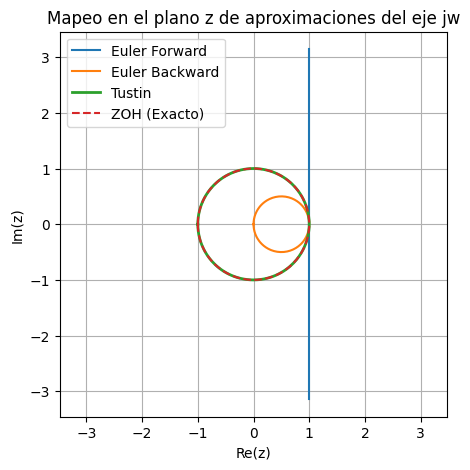

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 1.0  # Período de muestreo
w = np.linspace(-np.pi/T, np.pi/T, 500)
s = 1j * w
w_eback = np.exp(np.linspace(-15, 15, 500))
s_eback = 1j * np.hstack((-w_eback[::-1],w_eback))
#s_eback = 1j * w_eback

# Aproximaciones
z_euler_fwd = 1 + s*T         # Euler Forward: z = 1 + sT
z_euler_bwd = 1 / (1 - s_eback *T)   # Euler Backward: z = 1 / (1 - sT)
z_tustin = (1 + s_eback*T/2) / (1 - s_eback*T/2)  # Tustin: z = (1 + sT/2) / (1 - sT/2)
z_zoh = np.exp(s*T)           # ZOH: z = exp(sT)

# Graficar
plt.figure(figsize=(5,5))
plt.plot(np.real(z_euler_fwd), np.imag(z_euler_fwd), label='Euler Forward')
plt.plot(np.real(z_euler_bwd), np.imag(z_euler_bwd), label='Euler Backward')
plt.plot(np.real(z_tustin), np.imag(z_tustin), label='Tustin',linewidth=2)
plt.plot(np.real(z_zoh), np.imag(z_zoh), label='ZOH (Exacto)', linestyle='--')

# Círculo unitario
theta = np.linspace(0, 2*np.pi, 500)
#plt.plot(np.cos(theta), np.sin(theta), 'k:', label='Círculo unitario')

plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Mapeo en el plano z de aproximaciones del eje jw')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()